In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,Gai shi dao wang,1969


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [7]:
titles.title.value_counts().head(10)

Hamlet                  20
Carmen                  17
Macbeth                 15
Maya                    12
The Outsider            12
The Three Musketeers    11
Freedom                 11
Temptation              11
Othello                 11
Anna Karenina           10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [12]:
a=titles[titles.year//10*10==1930]
a.year.value_counts().head(3)

1937    1204
1936    1145
1938    1140
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

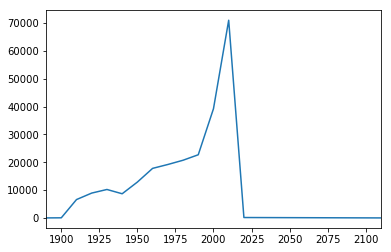

In [60]:
a=titles.sort_values("year")
a.year=a.year//10*10
a.year.value_counts().sort_index().plot()

### Plot the number of "Hamlet" films made each decade.

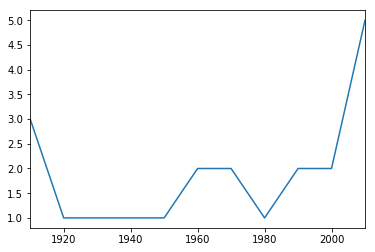

In [68]:
a=titles[titles.title=="Hamlet"]
a.year=a.year//10*10
a.year.value_counts().sort_index().plot()
#a.sort_values("year")

### Plot the number of "Rustler" characters in each decade of the history of film.

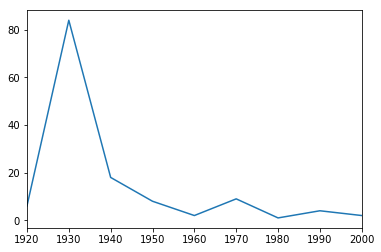

In [78]:
a=cast[cast.character=="Rustler"].sort_values("year")
a.year=a.year//10*10
a.year.value_counts().sort_index().plot()

### Plot the number of "Hamlet" characters each decade.

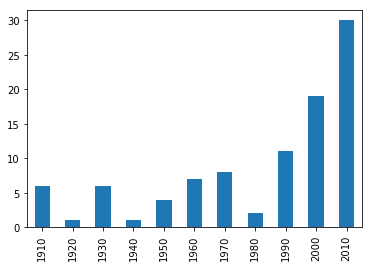

In [115]:
a=cast[cast.character=="Hamlet"].sort_values("year")
a.year=a.year//10*10
a.year.value_counts().sort_index().plot(kind="bar")

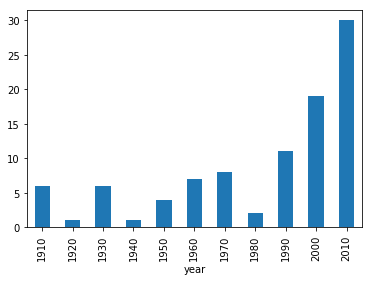

In [120]:
a=cast[cast.character=="Hamlet"]
a.groupby(a.year//10*10).size().plot(kind="bar")

### What are the 11 most common character names in movie history?

In [82]:
cast.character.value_counts().head(11)

Himself        20827
Dancer         12321
Extra          11767
Reporter        8370
Student         7656
Doctor          7616
Party Guest     7120
Policeman       7004
Nurse           6849
Bartender       6784
Herself         6604
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [91]:
cast[cast.character=="Herself"].name.value_counts().head(10)

Queen Elizabeth II        12
Joyce Brothers             9
Margaret Thatcher          9
Laura (II) M?gica          9
Marta Berrocal             8
Estrella Borja             8
Mar?a Luisa (V) Mart?n     8
In?s J. Southern           8
Marina Revilla             8
Luisa Horga                8
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [114]:
cast[cast.character=="Himself"].name.value_counts().head(10)

Adolf Hitler          98
Richard Nixon         46
Ronald Reagan         40
John F. Kennedy       36
George W. Bush        25
Winston Churchill     24
Ron Jeremy            23
Martin Luther King    22
Bill Clinton          22
Benito Mussolini      21
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [121]:
cast[cast.year==1945].name.value_counts().head(10)

Emmett Vogan        39
Sam (II) Harris     32
Bess Flowers        29
Harold Miller       29
Nolan Leary         27
Frank O'Connor      27
Franklyn Farnum     27
Larry Steers        25
Herman Hack         25
Charles Sullivan    24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [103]:
cast[cast.year==1985].name.value_counts().head(10)

1                              Homo $
485                    Risto Aaltonen
518                      Willie Aames
644                         Bob Aaron
663                        Eric Aaron
793                       Bob Aarrons
884                          T?nu Aav
896                       Evald Aavik
985                      Rene Abadeza
987                      Rene Abadeza
1111                    Richie Abanes
1194                   Dodo Abashidze
1195                   Dodo Abashidze
1234                  Levan Abashidze
1266                 Erwin Abastillas
1441                   Mairbek Abayev
1690                      Osama Abbas
1819                   Sal Abbatiello
1958                       Dave Abbot
2008                     Bruce Abbott
2035                       Bud Abbott
2132                     Jamie Abbott
2342                    Thomas Abbott
2434       Mohy-El-Deen Abd-El-Mohsen
2480                   Salah Abdallah
2544               Mahmoud Abdel Aziz
2553        

### Plot how many roles Mammootty has played in each year of his career.

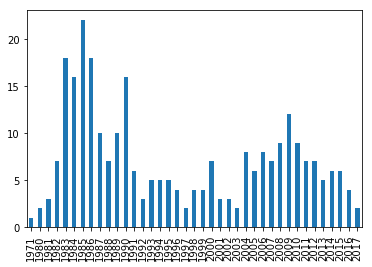

In [110]:
cast[cast.name=="Mammootty"].year.value_counts().sort_index().plot(kind="bar")

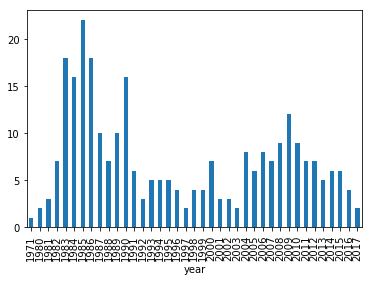

In [56]:
cast[cast.name=="Mammootty"].groupby(["year"]).size().plot(kind="bar")

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [17]:
cast[cast.character.str.startswith("Patron in",na=False)].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Coffee Shop            2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [19]:
cast[cast.character.str.startswith("Science",na=False)].character.value_counts().head(10)

Science Teacher         60
Science Student          9
Science Fair Student     9
Science Promo Cadet      5
Science Fair Judge       5
Science Club Member      5
Science Kid              5
Science Reporter         5
Science Fair Kid         4
Science                  4
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

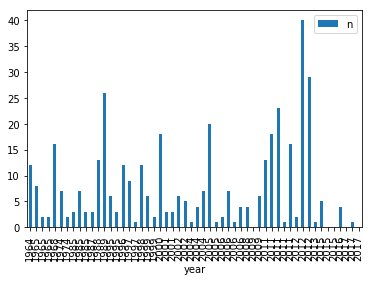

In [25]:
cast[cast.name=="Judi Dench"].sort_values("year").plot(x="year",y="n",kind="bar")

### Plot the n-values of Cary Grant's roles through his career.

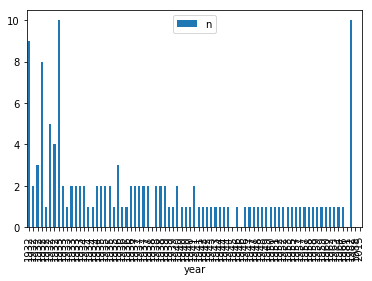

In [33]:
cast[cast.name=="Cary Grant"].sort_values("year").plot(x="year",y="n",kind="bar")

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

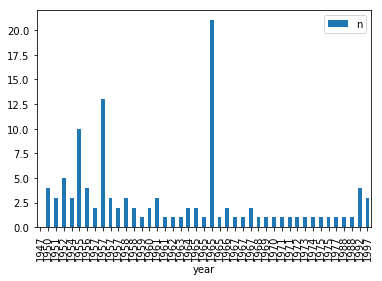

In [34]:
cast[cast.name=="Sidney Poitier"].sort_values("year").plot(x="year",y="n",kind="bar")

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [63]:
cast[(cast.year//10*10 ==1950) & (cast.n == 1)].type.value_counts()

actor      6701
actress    3007
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [66]:
cast[(cast.year//10*10==1950) & (cast.n == 2)].type.value_counts()

actor      4627
actress    4613
Name: type, dtype: int64

In [79]:
a=cast[(cast.year//10*10==1950)]
a.groupby((a.n==2) & (a.type=="actor")).size()

False    210214
True       4627
dtype: int64

In [25]:
c=cast.set_index(["title"]).sort_index()
c.head()

,year,name,type,character,n
title,,,,,
#1 Serial Killer,2013,Jason Tobin,actor,Eddy Tsai,1.0
#1 Serial Killer,2013,Patrick Chien,actor,Cleaver Victim,22.0
#1 Serial Killer,2013,Thomas Isao Morinaka,actor,Policeman #1,19.0
#1 Serial Killer,2013,Tiley Chao,actress,Mrs. Chang,12.0
#1 Serial Killer,2013,Kenzie Dalton,actress,Amber Sterling,5.0


In [30]:
c.loc["Sleuth"]

,year,name,type,character,n
title,,,,,
Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0
Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
Sleuth,2007,Carmel O'Sullivan,actress,Maggie,NaN
Sleuth,2007,Jude Law,actor,Milo,2.0
Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0
Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
Sleuth,2007,Eve (II) Channing,actress,Marguerite Wyke,NaN
Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0


In [31]:
c=cast.set_index(["title","year"]).sort_index()
c.head()

name   type               character     n
title            year                                                        
#1 Serial Killer 2013      Michael Alton  actor       Detective Roberts  17.0
                 2013         Aaron Aoki  actor      Plastic Bag Victim  21.0
                 2013  Zachary (X) Brown  actor  Africian American Teen  18.0
                 2013     Yvis Cannavale  actor            Homeless Man  25.0
                 2013      Patrick Chien  actor          Cleaver Victim  22.0

In [33]:
c.loc["Sleuth"].loc[1972]

,name,type,character,n
year,,,,
1972,Michael Caine,actor,Milo Tindle,2.0
1972,Alec Cawthorne,actor,Inspector Doppler,3.0
1972,Teddy Martin,actor,Police Constable Higgs,6.0
1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1972,Laurence Olivier,actor,Andrew Wyke,1.0
1972,Eve (III) Channing,actress,Marguerite Wyke,5.0


In [34]:
c.loc[("Sleuth",1972)]

name     type                   character    n
title  year                                                              
Sleuth 1972       Michael Caine    actor                 Milo Tindle  2.0
       1972      Alec Cawthorne    actor           Inspector Doppler  3.0
       1972        Teddy Martin    actor      Police Constable Higgs  6.0
       1972  John (II) Matthews    actor  Detective Sergeant Tarrant  4.0
       1972    Laurence Olivier    actor                 Andrew Wyke  1.0
       1972  Eve (III) Channing  actress             Marguerite Wyke  5.0

In [35]:
c.loc[("Sleuth",1972)].reset_index(["year","title"])

,title,year,name,type,character,n
0,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
1,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
2,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
3,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
4,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
5,Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0


In [107]:
#groupby

In [109]:
c=cast
c=c[c.name=="George Clooney"]
c.groupby(["title","year","character"]).size()

title                               year  character               
Batman & Robin                      1997  Batman                      1
                                          Bruce Wayne                 1
Burn After Reading                  2008  Harry Pfarrer               1
Confessions of a Dangerous Mind     2002  Jim Byrd                    1
Curdled                             1996  Seth Gecko                  1
Fantastic Mr. Fox                   2009  Mr. Fox                     1
From Dusk Till Dawn                 1996  Seth Gecko                  1
Good Night, and Good Luck.          2005  Fred Friendly               1
Gravity                             2013  Matt Kowalski               1
Grizzly II: The Concert             1983  Ron                         1
Hail, Caesar!                       2016  Baird Whitlock              1
Intolerable Cruelty                 2003  Miles                       1
Leatherheads                        2008  Dodge Connelly             